In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importação de bibliotecas Pandas, Numpy, Matplotlib.

In [2]:
#link para arquivo excel com dados de produção por plataforma
file = "http://www.anp.gov.br/images/Dados_de_EP/Producao_por_Plataforma/Historico_producao_por_plataforma.xlsx"
main_df = pd.read_excel(file, skiprows=10)#abertura do arquivo para dData_Frame pulando 10 linhas iniciais da planilha

In [3]:
main_df.head(15)#exibição de cabeçario 15 primeiras linhas para visualização de erros

,Nome,Período,Petróleo (bbl/dia),Gás natural (Mm³/dia),Água (bbl/dia)
0,ESPADARTE FPSO,2009/02,18341.98,311.87,45331.36
1,FPSO BRASIL,2009/02,71039.14,1235.23,10102.71
2,FPSO CAPIXABA,2009/02,14439.61,193.59,17475.79
3,FPSO CIDADE DE NITEROI,2009/02,1994.09,18.34,9.40
4,FPSO CIDADE DE VITÓRIA,2009/02,17198.59,120.89,41266.18
5,FPSO CIDADE DO RIO DE JANEIRO,2009/02,48552.62,275.27,15129.21
6,FPSO Fluminense,2009/02,30618.80,473.81,15398.44
7,FPSO JK,2009/02,32342.65,233.43,12641.40
8,FPSO MARLIM SUL,2009/02,40104.73,591.82,19782.72
9,FPSO Polvo,2009/02,17123.55,35.04,3263.40


In [4]:
colunas = main_df.columns
print("Colunas da planilha:",list(colunas))

Colunas da planilha: ['Nome', 'Período', 'Petróleo (bbl/dia)', 'Gás natural (Mm³/dia)', 'Água (bbl/dia)']


Edição de nomes das colunas para melhor tratamento dos dados.

In [5]:
novas_colunas = ['Nome','Periodo','Petroleo','Gas','Agua']#novos nomes para colunas
main_df.columns = novas_colunas #passando as novas colunas

In [6]:
main_df.head(10)

,Nome,Periodo,Petroleo,Gas,Agua
0,ESPADARTE FPSO,2009/02,18341.98,311.87,45331.36
1,FPSO BRASIL,2009/02,71039.14,1235.23,10102.71
2,FPSO CAPIXABA,2009/02,14439.61,193.59,17475.79
3,FPSO CIDADE DE NITEROI,2009/02,1994.09,18.34,9.40
4,FPSO CIDADE DE VITÓRIA,2009/02,17198.59,120.89,41266.18
5,FPSO CIDADE DO RIO DE JANEIRO,2009/02,48552.62,275.27,15129.21
6,FPSO Fluminense,2009/02,30618.80,473.81,15398.44
7,FPSO JK,2009/02,32342.65,233.43,12641.40
8,FPSO MARLIM SUL,2009/02,40104.73,591.82,19782.72
9,FPSO Polvo,2009/02,17123.55,35.04,3263.40


Edição da coluna período para dateTime e substituição do index pela mesma.

In [10]:
main_df.Periodo = pd.to_datetime(main_df.Periodo)#editando formato do período para formato data
main_df.set_index('Periodo', inplace = True)#colocando o período como index
main_df.head(10)

,Nome,Petroleo,Gas,Agua
Periodo,,,,
2009-02-01,ESPADARTE FPSO,18341.98,311.87,45331.36
2009-02-01,FPSO BRASIL,71039.14,1235.23,10102.71
2009-02-01,FPSO CAPIXABA,14439.61,193.59,17475.79
2009-02-01,FPSO CIDADE DE NITEROI,1994.09,18.34,9.40
2009-02-01,FPSO CIDADE DE VITÓRIA,17198.59,120.89,41266.18
2009-02-01,FPSO CIDADE DO RIO DE JANEIRO,48552.62,275.27,15129.21
2009-02-01,FPSO Fluminense,30618.80,473.81,15398.44
2009-02-01,FPSO JK,32342.65,233.43,12641.40
2009-02-01,FPSO MARLIM SUL,40104.73,591.82,19782.72


In [17]:
main_df.describe()#dados estatísticos da planilha em geral

,Petroleo,Gas,Agua
count,12996.000000,12996.000000,12996.000000
mean,18810.466113,574.167031,15109.533480
std,31407.027957,1184.716419,27053.338002
min,0.000000,0.000000,0.000000
25%,179.675000,14.495000,13.307500
50%,2620.905000,80.185000,869.665000
75%,24001.727500,531.950000,20367.222500
max,168331.840000,8424.430000,243925.780000


In [23]:
main_df.loc[main_df['Nome']=='ESPADARTE FPSO']

,Nome,Petroleo,Gas,Agua
Periodo,,,,
2009-02-01,ESPADARTE FPSO,18341.98,311.87,45331.36
2009-03-01,ESPADARTE FPSO,16967.88,250.82,44701.67
2009-04-01,ESPADARTE FPSO,18846.58,263.14,49396.28
2009-05-01,ESPADARTE FPSO,18913.26,279.61,49490.72
2009-06-01,ESPADARTE FPSO,18747.20,274.52,49325.05
2009-07-01,ESPADARTE FPSO,18671.20,254.70,45744.14
2009-08-01,ESPADARTE FPSO,16173.13,215.91,40242.90
2009-09-01,ESPADARTE FPSO,15088.00,303.35,32241.67
2009-10-01,ESPADARTE FPSO,15498.70,385.99,38408.04


In [26]:
main_df['Nome'].count()


12996

# Função de plotagem de produção por plataforma

In [141]:
#função e exibição de grafico por nome da plataforma e tipo de produção ao longo do tempo
def producao_plataforma(nome, ):
    plataforma = main_df.loc[main_df['Nome'] == nome]
    
    #gráfico de produção de petróleo
    plt.figure(figsize=[15,5])
    plt.xlabel('Período')
    plt.ylabel('Produção/Petróleo')
    plt.title(nome)
    plt.plot(plataforma['Petroleo'])
    plt.grid(color='black', linestyle='-.', linewidth=0.5)
    
    #gráfico de produção de gás natural
    plt.figure(figsize=[15,5])
    plt.xlabel('Período')
    plt.ylabel('Produção/Gás')
    plt.title(nome)
    plt.plot(plataforma['Gas'],'r')
    plt.grid(color='black', linestyle='-.', linewidth=0.5)
    
    #gráfico de produção de água
    plt.figure(figsize=[15,5])
    plt.xlabel('Período')
    plt.ylabel('Produção/Água')
    plt.title(nome)
    plt.plot(plataforma['Agua'],'g')
    plt.grid(color='black', linestyle='-.', linewidth=0.5)
    plt.show()
    
    return plataforma.describe()

# verificando se extiste valores nulos no dataset principal

In [87]:
main_df.isnull().sum()#verificando se extiste valores nulos no dataset principal

Nome        0
Petroleo    0
Gas         0
Agua        0
dtype: int64

# Chamada da função

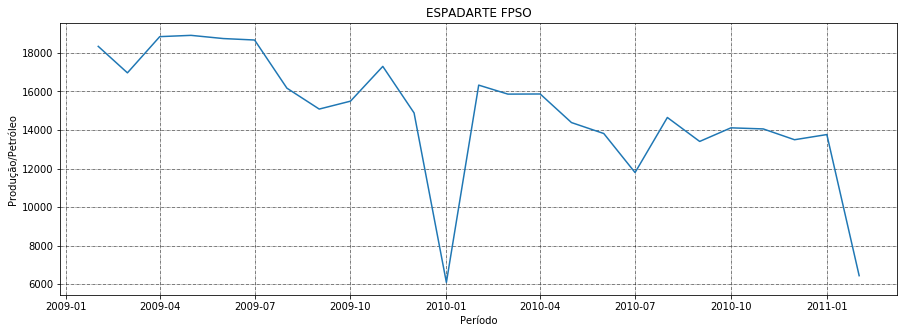

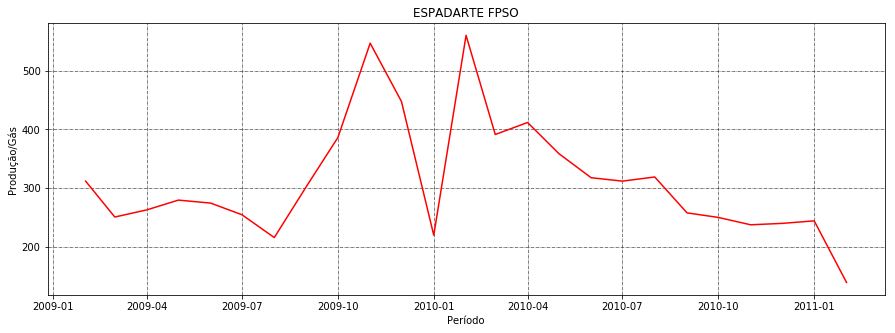

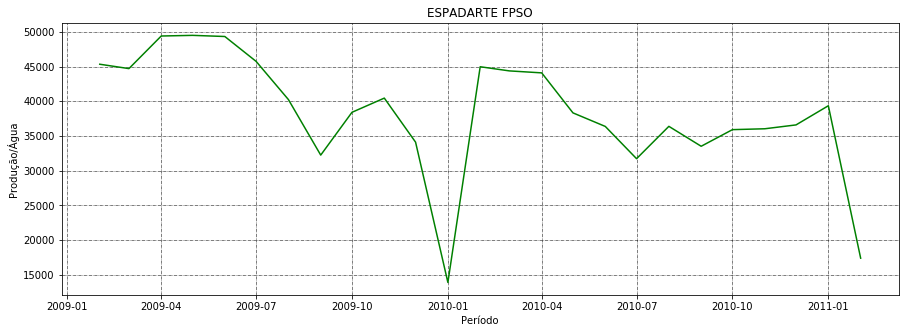

,Petroleo,Gas,Agua
count,25.00000,25.000000,25.000000
mean,14941.47600,311.730800,38334.362400
std,3262.99517,100.025635,8694.212075
min,6091.99000,139.570000,13897.320000
25%,13819.55000,250.170000,35908.540000
50%,15088.00000,279.610000,38408.040000
75%,16967.88000,358.730000,44701.670000
max,18913.26000,559.840000,49490.720000


In [142]:
producao_plataforma('ESPADARTE FPSO')

# Teste plotagem de matplotlib, Petróleo, Gás e Água

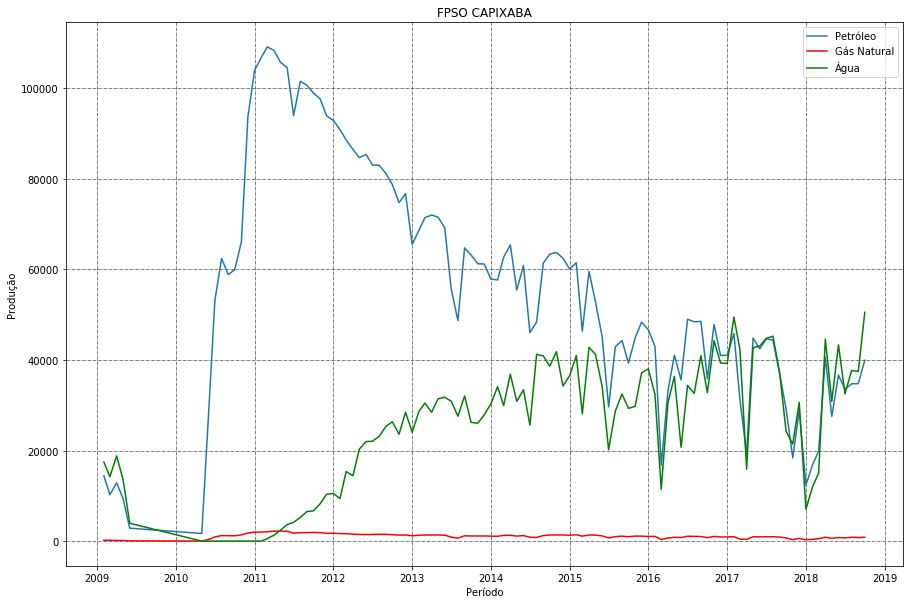

In [156]:
#Testes matplotlib
plataforma = main_df.loc[(main_df['Nome'] =='FPSO CAPIXABA' )]
plt.figure(figsize=[15,10])
plt.xlabel('Período')
plt.ylabel('Produção')
plt.title('FPSO CAPIXABA')
plt.plot(plataforma['Petroleo'])
plt.plot(plataforma['Gas'],'r')
plt.plot(plataforma['Agua'],'g')
plt.grid(color='black', linestyle='-.', linewidth=0.5)
plt.legend(('Petróleo', 'Gás Natural', 'Água'),
           loc='upper right')